In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [7]:
Zspec = Z[Z.columns[freq_list >= -12]].copy()
Zspec

,-12,-11,-10,-9,-6,-3,-2.75,-2.5,-2.25,-2,...,7,7.2,7.4,7.6,7.8,8,9,10,11,12
0,14675,14746,14779,14633,14402,14182,14059,13903,13520,13538,...,13769,13741,14178,14118,14524,14188,14422,14581,14560,14495
1,15407,15625,15604,15486,15397,14869,14761,14649,14529,14228,...,14682,14690,14890,15259,14828,15191,15381,15487,15341,15232
2,12672,12746,12724,12889,12710,12355,12131,12152,12036,11805,...,12112,12324,12376,12556,12499,12583,12482,12395,12609,12599
3,14341,14467,14028,14365,14070,13575,13468,13342,13135,12793,...,13482,13720,13773,14002,13844,13871,14114,14054,14090,14222
4,15509,15478,15668,15609,15191,14900,14718,14524,14259,13825,...,14344,14404,14559,14766,15239,15079,15148,15261,15376,15331
5,15314,15550,15217,15257,15113,14592,14502,14448,13979,13850,...,14296,14444,14826,14565,14732,14838,14706,14972,15225,15344
6,12656,12557,12445,12639,12328,11920,11738,11516,11491,11197,...,11805,11892,12083,11936,12033,12249,12179,12367,12437,12331
7,13998,13928,14131,14033,13966,13206,12950,12747,12420,11915,...,13360,13334,13296,13190,13313,13576,13529,13626,13676,14106
8,22813,23025,22673,22844,22350,21746,21346,21123,20968,20511,...,22410,22377,22435,22379,22307,22528,22504,22636,22613,22706
9,20850,20837,20870,20708,20590,19936,19723,19374,19020,18944,...,20261,20378,20447,20349,20364,20349,20669,20620,20483,20604


In [12]:
data = pd.DataFrame()
folders =[]
files = []
ncols = []

cols = ['pH', 'Conc(mM)', 'ApproT1(sec)', 'ExpT1(ms)', 'ExpT2(ms)',
       'ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)', 'Temp', 'SatPower(uT)',
       'SatTime(ms)']


for root, dirs, files in os.walk('./data2'):
        for i,file in enumerate(files):
            if file.endswith(".csv"):
                f = os.path.join(root, file)
                folders.append(f.split('/')[2]); 
                exp = pd.read_csv(f,header = 0)
                Z = exp.drop(cols,axis = 1)
                freq_list = np.array([float(freq) for freq in Z.columns])
                Zspec = Z[Z.columns[freq_list >= -12]].copy()
                ref = Z['-12'].copy()
                for FREQ in Zspec:
                    Zspec[FREQ] = Zspec[FREQ] / ref
                data = pd.concat([data,Zspec])

In [13]:
data

,-12,-11,-10,-9,-6,-3,-2.75,-2.5,-2.25,-2,...,7,7.2,7.4,7.6,7.8,8,9,10,11,12
0,1.0,0.995407,1.001294,1.003040,1.002005,0.991784,0.974835,0.960926,0.966943,0.945724,...,0.985121,0.980916,0.992496,0.992172,0.996830,0.989649,1.005822,1.003687,1.001164,0.994825
1,1.0,0.990305,1.001556,0.997666,0.989168,0.974147,0.977259,0.960443,0.954937,0.963076,...,0.976780,0.977080,0.994195,0.983064,0.980251,0.980910,0.989647,0.991502,0.994315,0.989527
2,1.0,1.001258,0.995635,0.999482,1.000518,0.989198,0.980468,0.975658,0.975141,0.969518,...,0.988976,0.994007,0.995635,0.985129,1.001036,0.999704,1.002368,1.001406,0.999630,1.010728
3,1.0,1.004496,1.000805,1.002013,0.998322,0.979332,0.961482,0.948799,0.950946,0.936049,...,0.987451,0.971145,0.982821,0.995101,1.010133,0.997114,0.994564,1.008187,1.007918,1.002416
4,1.0,1.006760,0.998491,1.011831,0.991731,0.972234,0.979598,0.957627,0.936319,0.942778,...,0.971449,0.982676,0.994386,0.984065,0.991731,0.990101,0.999276,0.999577,1.001388,0.992213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1.0,1.011522,1.000768,1.003027,0.990060,0.961233,0.962362,0.952828,0.950569,0.938370,...,0.961368,0.975465,0.970902,0.977047,0.982333,0.991686,0.981113,0.991867,0.991280,0.996928
20,1.0,1.003879,1.000440,1.002839,0.990002,0.972487,0.957970,0.960090,0.944693,0.939854,...,0.957130,0.952491,0.968568,0.959770,0.969407,0.984404,0.990482,0.979805,0.996521,0.989523
21,1.0,0.994814,0.999357,0.991436,0.988944,0.951232,0.954047,0.955494,0.944438,0.934266,...,0.947654,0.951353,0.963052,0.966309,0.973747,0.971857,0.984079,0.984079,0.983315,0.975435
22,1.0,0.993590,0.988816,0.992087,0.979843,0.956812,0.949872,0.953983,0.944081,0.936699,...,0.944744,0.945584,0.960879,0.953894,0.966051,0.973654,0.969897,0.978207,0.983644,0.993900


In [22]:
plt.boxplot?

Signature:
plt.boxplot(
    x,
    notch=None,
    sym=None,
    vert=None,
    whis=None,
    positions=None,
    widths=None,
    patch_artist=None,
    bootstrap=None,
    usermedians=None,
    conf_intervals=None,
    meanline=None,
    showmeans=None,
    showcaps=None,
    showbox=None,
    showfliers=None,
    boxprops=None,
    labels=None,
    flierprops=None,
    medianprops=None,
    meanprops=None,
    capprops=None,
    whiskerprops=None,
    manage_ticks=True,
    autorange=False,
    zorder=None,
    *,
    data=None,
)
Docstring:
Make a box and whisker plot.

Make a box and whisker plot for each column of ``x`` or each
vector in sequence ``x``.  The box extends from the lower to
upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the
data.  Flier points are those past the end of the whiskers.

Parameters
----------
x : Array or a sequence of vectors.
    The input data.

notch : bool, optional (False)
    I

In [21]:
data.boxplot?

Signature:
data.boxplot(
    column=None,
    by=None,
    ax=None,
    fontsize=None,
    rot=0,
    grid=True,
    figsize=None,
    layout=None,
    return_type=None,
    **kwds,
)
Docstring:
Make a box plot from DataFrame columns.

Make a box-and-whisker plot from DataFrame columns, optionally grouped
by some other columns. A box plot is a method for graphically depicting
groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). The whiskers extend from the edges
of box to show the range of the data. The position of the whiskers
is set by default to `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box.
Outlier points are those past the end of the whiskers.

For further details see
Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.

Parameters
----------
column : str or list of str, optional
    Column name or list of names, or vector.
    Can be any valid input to :meth:`

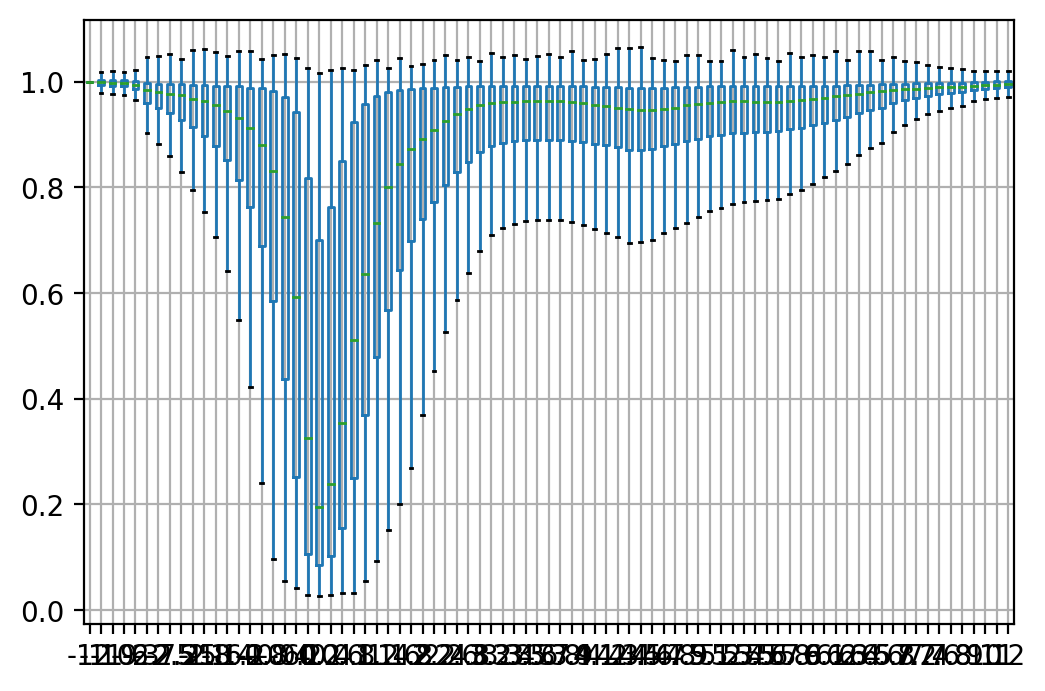

In [23]:
plt.figure(dpi = 200)
data.boxplot(showfliers=False)

In [ ]:
freq_list = np.array([float(freq) for freq in data.columns])

filt = (freq_list >= -3) & (freq_list <=3)
cols = data.columns[filt]
C = np.corrcoef(data[cols].T).T
C = pd.DataFrame(np.round(C,2))
C.columns = cols
C.index = cols



plt.figure(dpi=200)
sns.heatmap(C,cmap = 'cool' ,vmin = 0)

In [ ]:
cols

In [ ]:
data.NCols.value_counts()

In [ ]:
data.sort_values('NCols')

In [ ]:
d1.columns

In [ ]:
d1 = pd.read_csv('./data2/NewBox1_37C/TableofData_SatP05SatT6000.csv')
d2 = pd.read_csv('./data2/NewBox1_37C/TableofData_SatP6SatT500.csv')

In [ ]:
d1.head(10)

In [ ]:
d1[['-149.998', '-148.998', '-147.998',
       '-12', '-11', '-10']].head(3)


In [ ]:
34*.5

In [ ]:
d2[['-149.998', '-148.998', '-147.998',
       '-146.998', '-145.998', '-144.998', '-143.998', '-142.998',
       '-141.998', '-140.998', '-139.998', '-138.998', '-137.998',
       '-136.998', '-135.998', '-134.998', '-133.998', '-132.998',
       '-131.998', '-130.998', '-129.998', '-128.998', '-127.998',
       '-126.998', '-125.998', '-124.998', '-123.998', '-122.998',
       '-121.999', '-120.999', '-119.999', '-118.999', '-117.999',
       '-116.999']].shape

In [ ]:


def load_csv(data_folder_path):
    data = pd.DataFrame()
    files = []
    counter = 0
    for root, dirs, files in os.walk(data_folder_path):
        for i,file in enumerate(files):
            if file.endswith(".csv"):
                f = os.path.join(root, file)
                counter += 1
                #print(f)
                exp = pd.read_csv(f,header = 0)
                print(len(exp.columns))
                #data = pd.concat( (data,  exp),sort = True )
    print('{} cvs files were loaded'.format(counter))
    #data = data.drop(['ApproT1(sec)','ExpB0(ppm)','ExpB1(percent)'],axis = 1)
    #metcol = ['Conc(mM)', 'ExpB0(Hz)', 'ExpT1(ms)', 'ExpT2(ms)', 'SatPower(uT)','SatTime(ms)', 'Temp','pH']
    #meta = data[metcol]
    #Z = data.drop(metcol,axis = 1)
    
    return 

In [ ]:
from src import tools as tl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d = tl.load_csv('./data2'),axis = 1)

In [ ]:
pd.read_csv('./data2/NewBox1_37C/TableofData_SatP05SatT1000.csv',header = 0)

In [ ]:
load_csv('./data2')


In [ ]:
w = ['-149.998',
 '-148.998',
 '-147.998',
 '-146.998',
 '-145.998',
 '-144.998',
 '-143.998',
 '-142.998',
 '-141.998',
 '-140.998',
 '-139.998',
 '-138.998',
 '-137.998',
 '-136.998',
 '-135.998',
 '-134.998',
 '-133.998',
 '-132.998',
 '-131.998',
 '-130.998',
 '-129.998',
 '-128.998',
 '-127.998',
 '-126.998',
 '-125.998',
 '-124.998',
 '-123.999',
 '-123.998',
 '-122.999',
 '-122.998',
 '-121.999',
 '-120.999',
 '-119.999',
 '-118.999',
 '-117.999',
 '-116.999']

In [ ]:
import numpy as np

In [ ]:
[np.round(float(v)) for v in w]

In [ ]:
v = [float(val) for val in Zspec.columns.values]
v.sort()
cols = [str(val) for val in v]

Zspec.columns

In [ ]:
# combinations
c= ['Conc(mM)', 'ExpB0(Hz)', 'ExpT1(ms)', 'ExpT2(ms)', 'SatPower(uT)','SatTime(ms)', 'Temp','pH']
d = data[c].copy()
for col in ['Conc(mM)', 'ExpB0(Hz)', 'ExpT1(ms)', 'ExpT2(ms)']:
    d[col] = d[col].apply(lambda x: np.round(x,0))

print(d.nunique())
print('---'*20)

for col in c:
    plt.figure()
    data[col].hist();
    plt.title(col)
    plt.ylabel('Count')

In [ ]:
x = [float(v) for v in data.drop(c,axis = 1).columns.values]
sns.distplot(x)

In [ ]:
sns.heatmap?

In [ ]:
sns.heatmap?

In [ ]:
data.drop(c,axis = 1).columns.values

In [ ]:
C = np.corrcoef

In [ ]:
data.drop(c,axis = 1).values

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
import scikitplot as skplt